In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import math

In [2]:
dane = pd.read_csv("dane/insurance.csv")

In [3]:
dane

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
print(dane.columns[0])

age


In [5]:
def drawAllHist(data, histNumInRow, res):
    """
    Funkcja rysująca histogramy z podanych danych w postaci siatki wykresów
    :param data: dane w postaci np.array wczytane z sklearn
    :param histNumInRow: wartość całkowita określająca ilość histogramów w jednym rzędzie
    :param res: rozdzielczość histogramów
    """
    # ile mamy kolumn w danych
    cols = data.values.shape[1]
    # liczymy ile ma być rzędów
    howManyHistRows = math.ceil(cols/histNumInRow)
    # tworzymy kontener na wykresy
    fig, axs = plt.subplots(howManyHistRows, histNumInRow, figsize=(20, 40))
    # rysujemy, idziemy po rzędach i rysujemy w każdej kolumnie
    for r in range(histNumInRow):
        for c in range(howManyHistRows):
            # liczymy indeks kolumny w danych
            idx = int(c * histNumInRow + r)
            # sprawdzamy czy tyle w ogóle ich mamy
            if idx < cols:
                axs[c, r].set_title(data.columns[idx])
                axs[c, r].hist(data[data.columns[idx]], bins=res)
            else:
                break
    plt.show()

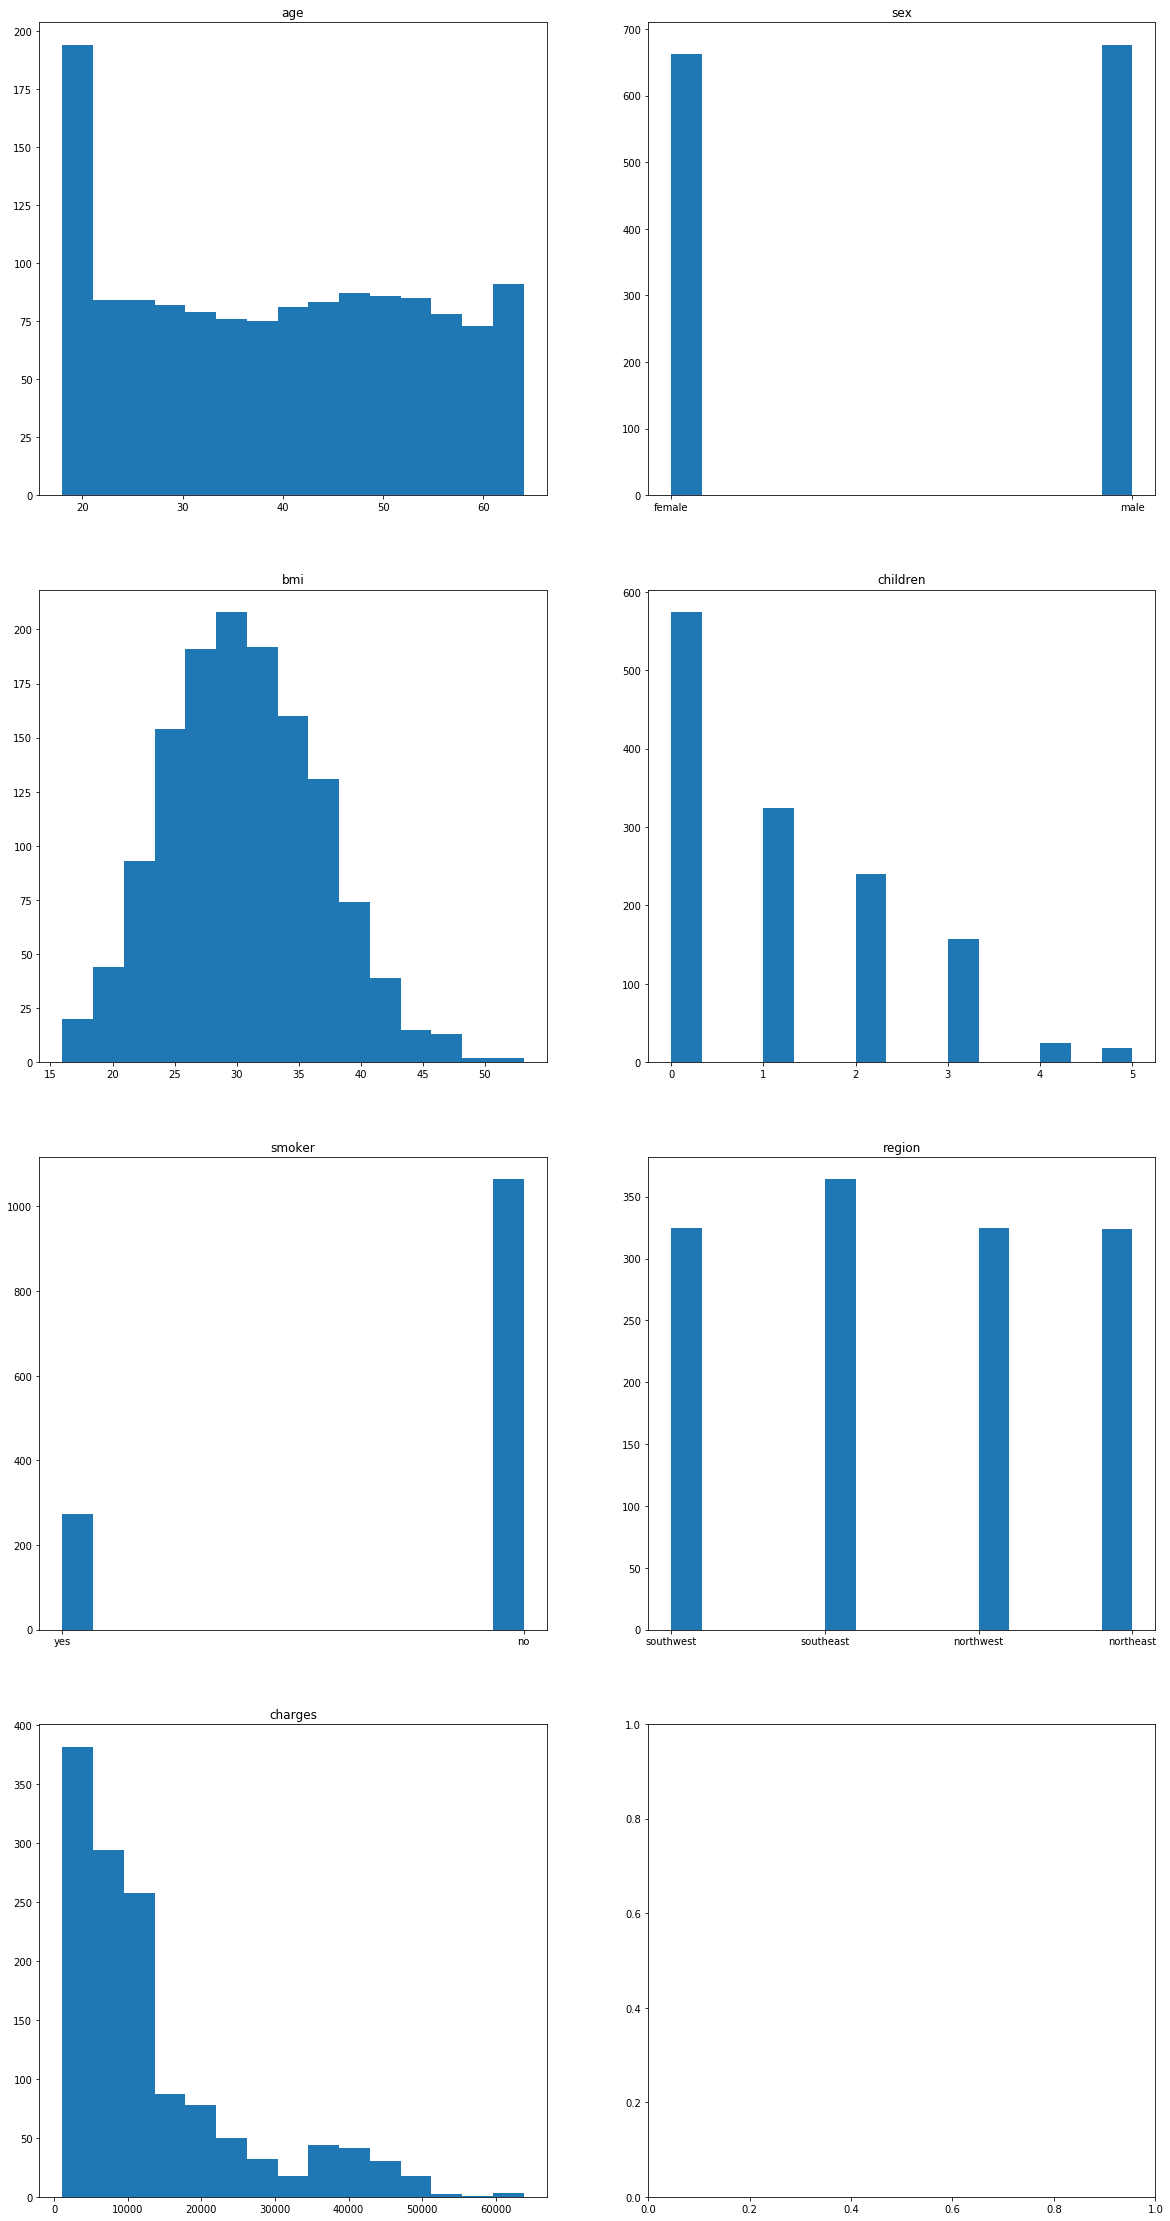

In [6]:
drawAllHist(dane, 2, 15)

In [7]:
dane.info() # są kolumny które trzeba enkodować

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
dane.isna().all().all #nie ma pustych danych

<bound method Series.all of age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool>

### Enkodowanie

In [9]:
dane['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [10]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [11]:
ohenc = OneHotEncoder()
labenc = LabelEncoder()

dane_enc = dane.drop(columns = ['region', 'sex', 'smoker' ])
region_enc = pd.DataFrame(ohenc.fit_transform(dane[['region']]).toarray(), columns = ['northeast','northwest','southeast','southwest'])
sex_enc = pd.DataFrame(labenc.fit_transform(dane[['sex']]), columns = ['is_male'])
smoker_enc = pd.DataFrame(labenc.fit_transform(dane[['smoker']]), columns = ['is_smoker'])

dane_enc = dane_enc.join(region_enc, how='outer')
dane_enc = dane_enc.join(sex_enc, how='outer')
dane_enc = dane_enc.join(smoker_enc, how='outer')
dane_enc

C:\Users\pmoni\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,age,bmi,children,charges,northeast,northwest,southeast,southwest,is_male,is_smoker
0,19,27.900,0,16884.92400,0.0,0.0,0.0,1.0,0,1
1,18,33.770,1,1725.55230,0.0,0.0,1.0,0.0,1,0
2,28,33.000,3,4449.46200,0.0,0.0,1.0,0.0,1,0
3,33,22.705,0,21984.47061,0.0,1.0,0.0,0.0,1,0
4,32,28.880,0,3866.85520,0.0,1.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0.0,1.0,0.0,0.0,1,0
1334,18,31.920,0,2205.98080,1.0,0.0,0.0,0.0,0,0
1335,18,36.850,0,1629.83350,0.0,0.0,1.0,0.0,0,0
1336,21,25.800,0,2007.94500,0.0,0.0,0.0,1.0,0,0


### Dodanie nowych zmiennych

In [12]:
# a = pd.DataFrame(dane_enc['age'] * dane_enc['age'])
# a
# nowa_kolumna8 = pd.DataFrame(dane_enc['age'] * dane_enc['age']) 
# nowa_kolumna8
# nowa_kolumna15 = pd.DataFrame(np.log(dane_enc['age']))
# nowa_kolumna15
# d = pd.DataFrame(dane_enc['bmi'] * dane_enc['bmi'], columns = ['AgeAge'])
# d

In [13]:
# do regresji (przy drzewach trzeba sprawdzić czy warto tworzyć nowe zmienne)
# nowa_kolumna1 = pd.DataFrame(dane_enc['age'] * dane_enc['bmi'], columns = ['AgeBmi']) 
# nowa_kolumna2 = pd.DataFrame(dane_enc['children'] * dane_enc['bmi'], columns = ['ChildrenBmi'])
# nowa_kolumna3 = pd.DataFrame(dane_enc['age'] * dane_enc['children'] * dane_enc['bmi'], columns = ['AgeChildrenBmi'])
# nowa_kolumna4 = pd.DataFrame(dane_enc['age'] * dane_enc['children'], columns = ['AgeChildren'])
# nowa_kolumna5 = pd.DataFrame(dane_enc['age'] * dane_enc['is_male'], columns = ['AgeIsMale'])
# nowa_kolumna6 = pd.DataFrame(dane_enc['bmi'] * dane_enc['is_male'], columns = ['BmiIsMale'])
# nowa_kolumna7 = pd.DataFrame(dane_enc['children'] * dane_enc['is_male'], columns = ['ChildrenIsMale'])

# Sqrt
# nowa_kolumna8 = pd.DataFrame(dane_enc['age'] * dane_enc['age'], columns = ['AgeSqrt']) 
# nowa_kolumna9 = pd.DataFrame(dane_enc['bmi'] * dane_enc['bmi'], columns = ['BmiSqrt'])
# nowa_kolumna10 = pd.DataFrame(dane_enc['children'] * dane_enc['children'], columns = ['childrenSqrt'])

#Log
# nowa_kolumna15 = pd.DataFrame(np.log(dane_enc['age']), columns = ['AgeLog']) 
# nowa_kolumna16 = pd.DataFrame(np.log(dane_enc['bmi']), columns = ['BmiLog'])

# dane_enc = dane_enc.join(nowa_kolumna1, how='outer')
# dane_enc = dane_enc.join(nowa_kolumna2, how='outer')
# dane_enc = dane_enc.join(nowa_kolumna3, how='outer')
# dane_enc = dane_enc.join(nowa_kolumna4, how='outer')
# dane_enc = dane_enc.join(nowa_kolumna5, how='outer')
# dane_enc = dane_enc.join(nowa_kolumna6, how='outer')
# dane_enc = dane_enc.join(nowa_kolumna7, how='outer')

# dane_enc = dane_enc.join(nowa_kolumna8, how='outer')
# dane_enc = dane_enc.join(nowa_kolumna9, how='outer')
# dane_enc = dane_enc.join(nowa_kolumna10, how='outer')

# dane_enc = dane_enc.join(nowa_kolumna15, how='outer')
# dane_enc = dane_enc.join(nowa_kolumna16, how='outer') 

dane_enc

,age,bmi,children,charges,northeast,northwest,southeast,southwest,is_male,is_smoker
0,19,27.900,0,16884.92400,0.0,0.0,0.0,1.0,0,1
1,18,33.770,1,1725.55230,0.0,0.0,1.0,0.0,1,0
2,28,33.000,3,4449.46200,0.0,0.0,1.0,0.0,1,0
3,33,22.705,0,21984.47061,0.0,1.0,0.0,0.0,1,0
4,32,28.880,0,3866.85520,0.0,1.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0.0,1.0,0.0,0.0,1,0
1334,18,31.920,0,2205.98080,1.0,0.0,0.0,0.0,0,0
1335,18,36.850,0,1629.83350,0.0,0.0,1.0,0.0,0,0
1336,21,25.800,0,2007.94500,0.0,0.0,0.0,1.0,0,0


In [14]:
dane_enc.isna().all()

age          False
bmi          False
children     False
charges      False
northeast    False
northwest    False
southeast    False
southwest    False
is_male      False
is_smoker    False
dtype: bool

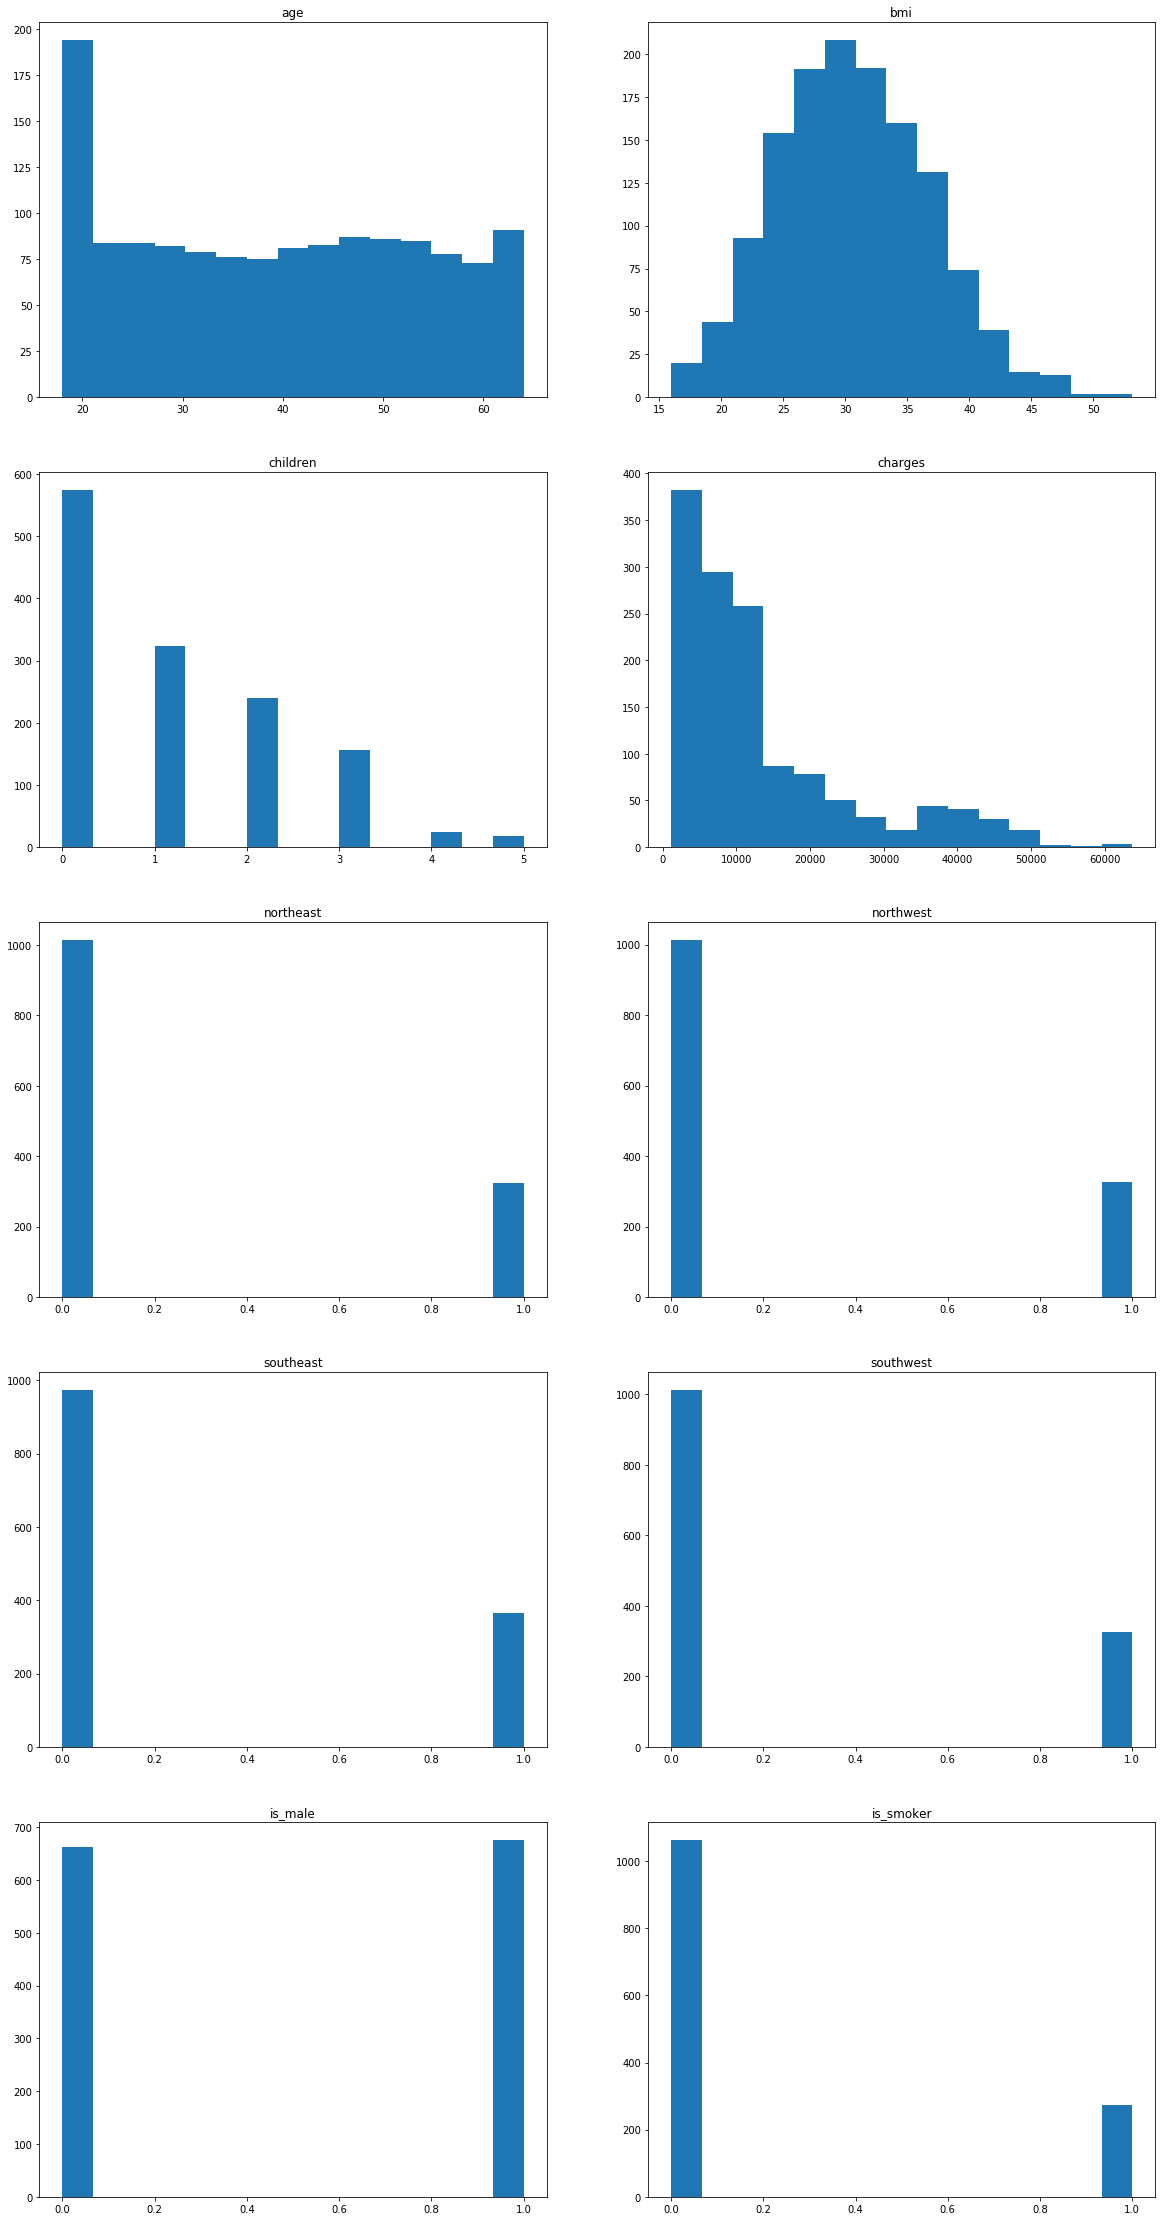

In [15]:
drawAllHist(dane_enc, 2, 15)

#### Usunięcie outlajerów

In [16]:
def outlier_iqr(df, colums):
    lower_limit = {}
    upper_limit = {}

    for col in colums:
        q1 = np.quantile(df[col], q=.25)
        q3 = np.quantile(df[col], q=.75)

        iqr = q3 - q1

        lower_limit[col] = q1 - 1.5 * iqr
        upper_limit[col] = q3 + 1.5 * iqr
        
    for col in colums:
        df = df.loc[(df[col] >= lower_limit[col]) & (df[col] <= upper_limit[col])]
    
    return df

In [17]:
dane_enc.columns

Index(['age', 'bmi', 'children', 'charges', 'northeast', 'northwest',
       'southeast', 'southwest', 'is_male', 'is_smoker'],
      dtype='object')

In [18]:
dane_enc = outlier_iqr(dane_enc, ['age', 'bmi', 'charges'])
#                                   , 'AgeBmi',
#        'ChildrenBmi', 'AgeChildrenBmi', 'AgeChildren', 'AgeIsMale',
#        'BmiIsMale'])
print(dane_enc.shape)
print(dane_enc.isna().all())

(1193, 10)
age          False
bmi          False
children     False
charges      False
northeast    False
northwest    False
southeast    False
southwest    False
is_male      False
is_smoker    False
dtype: bool


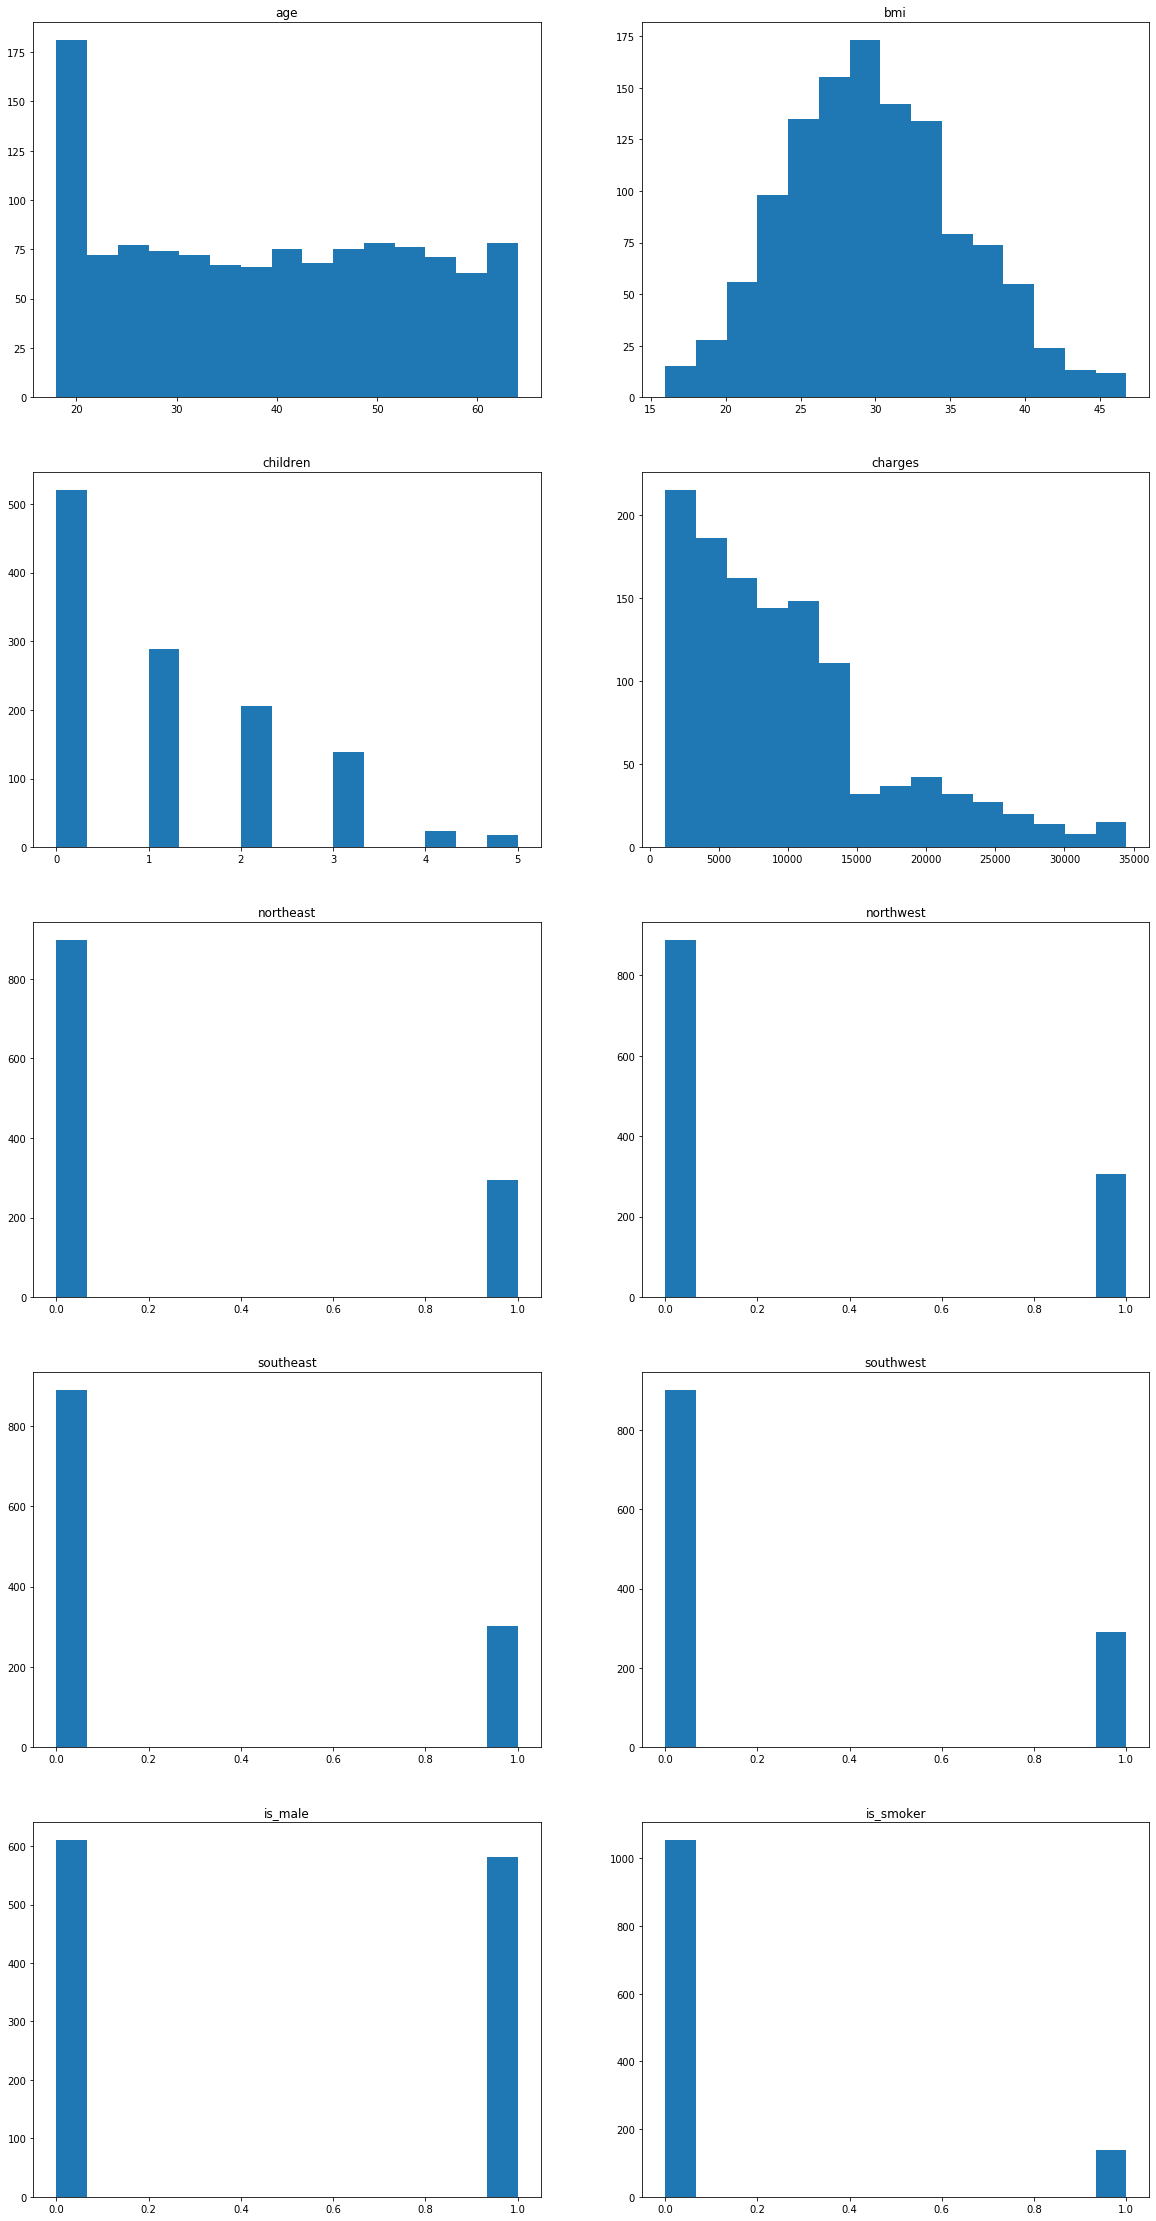

In [19]:
drawAllHist(dane_enc, 2, 15)

### Podział na zbiór treningowy / testowy i walidacyjny & Standaryzacja i Normalizacja

In [20]:
from sklearn.model_selection import train_test_split

X = dane_enc.drop(columns = ['charges'])
y = dane_enc['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size= .2)
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_train, y_train, random_state = 12, test_size= .2) 

### Standaryzacja i Normalizacja (dannych treningowych, walidacyjnych i testowych)

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

STDscaler = StandardScaler()
NRMscaler = MinMaxScaler()

# zmienne treningowe
X_train_v_std = STDscaler.fit_transform(X_train_v)
X_train_v_std_nrm = NRMscaler.fit_transform(X_train_v_std)

# zmienne walidacyjne
X_test_v_std = STDscaler.fit_transform(X_test_v)
X_test_v_std_nrm = NRMscaler.fit_transform(X_test_v_std)
X_test_std = STDscaler.fit_transform(X_test)
X_test_std_nrm = NRMscaler.fit_transform(X_test)


In [22]:
regrProjectDataSplit = (X_train_v_std_nrm, X_test_std_nrm, X_test_v_std_nrm, y_train_v, y_test, y_test_v)

In [23]:
print(X_train_v_std_nrm.shape, X_test_std_nrm.shape, X_test_v_std_nrm.shape, y_train_v.shape, y_test.shape, y_test_v.shape)

(763, 9) (239, 9) (191, 9) (763,) (239,) (191,)


### Budowa modelu

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [25]:
regrModelsProject = {
    "linear": LinearRegression(),
    "decision_tree": DecisionTreeRegressor(),
    "random_forest": RandomForestRegressor(),
    "xgboost": XGBRegressor(objective="reg:squarederror"),
    "svm": SVR(),
    "knn": KNeighborsRegressor()
}

---
### 6. Trening

- wykonujemy trening przy pomocy kross-waldiacji
- uniwersalna funkcja do treningu jakiegokolwiek modelu
- jako rezultat treningu cv pobieramy średnie wartości 'fit_time', score_time, test_score
- uniwrsalna funkcja do wykreślania wyników treningu kilku modeli na jednym wykresie. Porównanie średnich wartości z treningu.
- przeprowadzamy trening i rysujemy wyniki

In [26]:
# import numpy as np
# import sklearn
# import matplotlib.pyplot as plt
# import math
# import xgboost

from sklearn.model_selection import cross_validate

# from sklearn.model_selection import train_test_split
# from sklearn import datasets

In [27]:
# funkcja trenująca model
def trainCV(model, data, target, cv=5):
    """
    funkcja przeprowadzająca krosswalidację oraz zwracająca średnie wartości czasów i score'a
    :param model: model estymatora z pakietu sklearn
    :param data: cechy do przeprowadzenia uczenia
    :param target: wartości wyjściowe
    :param cv: ilość podziałów na krosswalidację, domyślnie 5
    """
    # przeprowadzamy kross walidację i zbieramy wyniki
    results = cross_validate(model, data, target, cv=cv)
    # zwracamy średnie ze wszystkich przebiegów
    outputDict = {
        'meanFitTime': results['fit_time'].mean(),
        'meanScoreTime': results['score_time'].mean(),
        'meanScore':  results['test_score'].mean()
    }
    return outputDict

#### uczymy i wykreślamy wyniki treningu

In [28]:
def printResultsCharts(results, figsize=(15, 20)):
    """
    Wyświetlanie wykresów wyników treningu
    :param results: wyniki treningu w postaci słownika list, np. {
        "modelName": [], <- ta lista musi być zawsze, reszta jest opcjonalna
        "meanScore": [], 
        "meanFitTime": [],
        "meanScoreTime": []}
    """
    # pobieramy listę nazw zawartości
    keys = list(results.keys())
    
    # tworzymy kontener na wykresy
    axis_number = len(keys)-1
    fig, axs = plt.subplots(axis_number, 1, figsize=figsize)
    if axis_number > 1:
        for i in range(axis_number):
            axs[i].bar(results[keys[0]],results[keys[i+1]])
            axs[i].set_ylabel(keys[i+1])
            axs[i].set_title(keys[i+1])
            axs[i].set_xlabel(keys[0])
    else:
        axs.bar(results[keys[0]],results[keys[1]])
        axs.set_ylabel(keys[1])
        axs.set_title(keys[1])
        axs.set_xlabel(keys[0])

In [29]:
def TrainAndPrintResults(modelList, dataset, figsize=(15, 20)):
    """
    funkcja przeprowadzająca trening na liście modeli.
    :param modelList: Lista modeli kompatybilnych z pakietem sklearn
    :param dataset: krotka datasetu po podziale na train i test w postaci (x_train, x_test, y_train, y_test)
    """
    # bierzemy z datasetu dane treningowe
    x_train, x_test, x_validate, y_train, y_test, y_validate = dataset
    # pusty słownik na wyniki
    results = {
        "modelName": [],
        "meanScore": [],
        "meanFitTime": [],
        "meanScoreTime": []
    }
    # lecimy po modelach i uczymy
    for oneM in modelList:
        tmpOneRes = trainCV(modelList[oneM], x_train, y_train)
        print("{0} mean train score = {1}".format(oneM,(tmpOneRes['meanScore'])))
        results["modelName"].append(oneM)
        results["meanScore"].append(tmpOneRes['meanScore'])
        results["meanFitTime"].append(tmpOneRes['meanFitTime'])
        results["meanScoreTime"].append(tmpOneRes['meanScoreTime'])
        #finally fit on whole train data
        modelList[oneM].fit(x_train, y_train)
    
    # present results on charts
    printResultsCharts(results, figsize=figsize)

linear mean train score = 0.5886267642688061
decision_tree mean train score = 0.07199671361443967
random_forest mean train score = 0.55331609034595
xgboost mean train score = 0.423170963425856
svm mean train score = -0.04112548309978066
knn mean train score = 0.5055739800300747


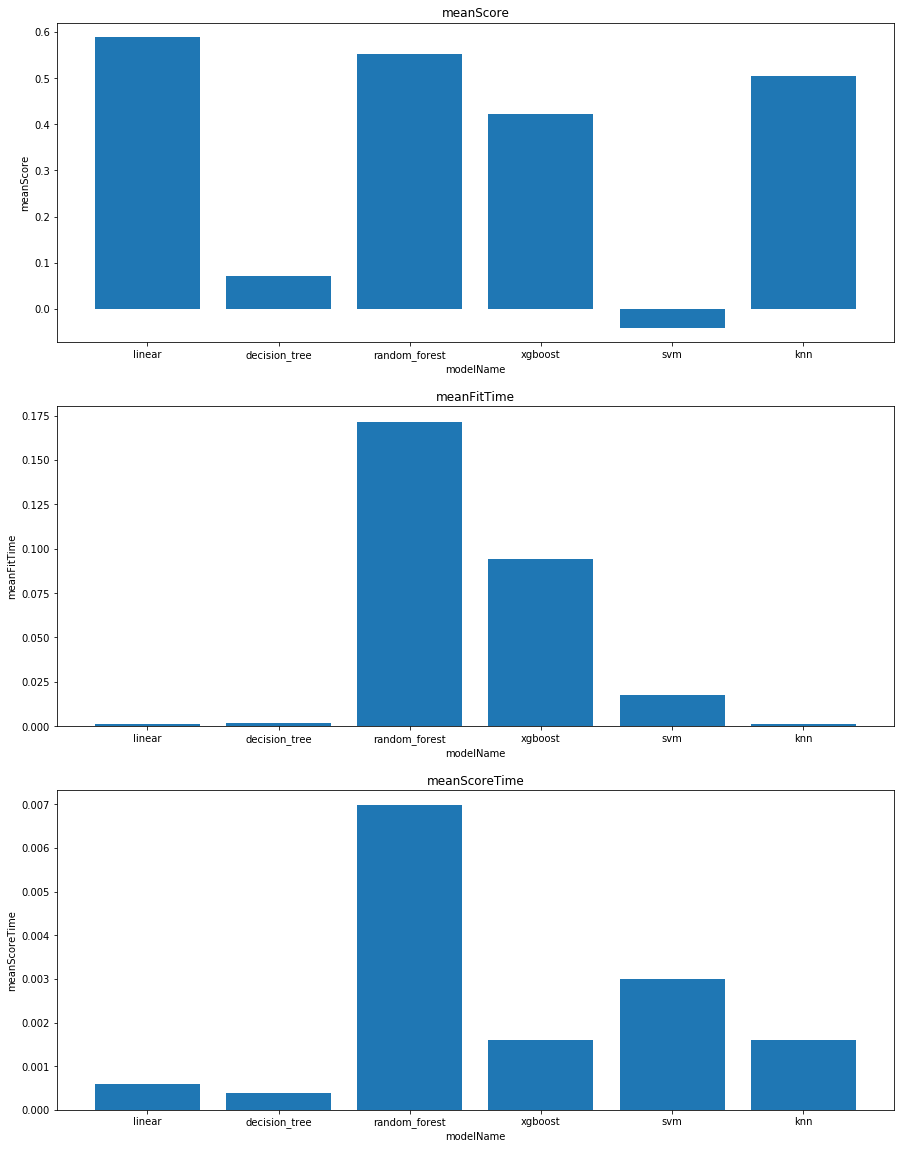

In [30]:
regrProjectResults = TrainAndPrintResults(regrModelsProject, regrProjectDataSplit)

---
## 7. Test
- analogicznie do treningu tworzymy uniwersalna funkcję dla jakiegokolwiek modelu
- dostaje listę modeli i dane do testu
- kolejna funkcja do rysowania wyników testu kilku modeli naraz, do porównania
- wnioski

In [31]:
def ValidateAndPrintResults(modelList, dataset, figsize=(15, 5)):
    """
    funkcja przeprowadzająca trening na liście modeli.
    :param modelList: Lista modeli kompatybilnych z pakietem sklearn
    :param dataset: krotka datasetu po podziale na train i test w postaci (x_train, x_test, y_train, y_test)
    """
    # bierzemy z datasetu dane treningowe
    x_train, x_test, x_validate, y_train, y_test, y_validate = dataset
    # pusty słownik na wyniki
    results = {
        "modelName": [],
        "testScore": []
    }
    # lecimy po modelach i uczymy
    for oneM in modelList:
        testScore = modelList[oneM].score(x_validate, y_validate)
        print("{0} score = {1}".format(oneM,testScore))
        results["modelName"].append(oneM)
        results["testScore"].append(testScore)
        
    printResultsCharts(results, figsize=figsize)

linear score = 0.5862634661865576
decision_tree score = 0.36411014536591924
random_forest score = 0.6075457813810898
xgboost score = 0.5630264843448562
svm score = -0.053340364420325415
knn score = 0.5219879926826984


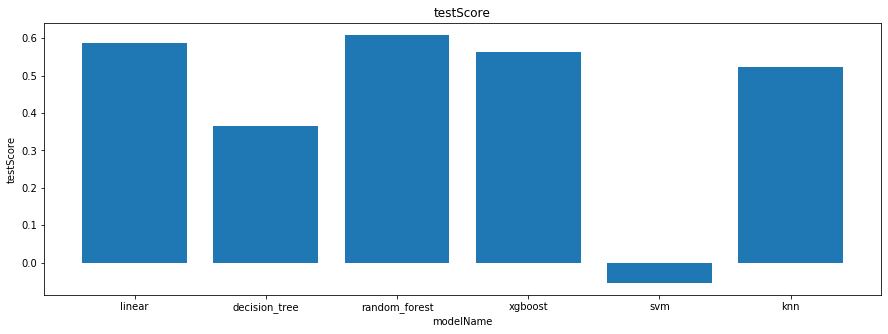

In [32]:
ValidateAndPrintResults(regrModelsProject, regrProjectDataSplit)

In [33]:
def TestAndPrintResults(modelList, dataset, figsize=(15, 5)):
    """
    funkcja przeprowadzająca trening na liście modeli.
    :param modelList: Lista modeli kompatybilnych z pakietem sklearn
    :param dataset: krotka datasetu po podziale na train i test w postaci (x_train, x_test, y_train, y_test)
    """
    # bierzemy z datasetu dane treningowe
    x_train, x_test, x_validate, y_train, y_test, y_validate = dataset
    # pusty słownik na wyniki
    results = {
        "modelName": [],
        "testScore": []
    }
    # lecimy po modelach i uczymy
    for oneM in modelList:
        testScore = modelList[oneM].score(x_test, y_test)
        print("{0} score = {1}".format(oneM,testScore))
        results["modelName"].append(oneM)
        results["testScore"].append(testScore)
        
    printResultsCharts(results, figsize=figsize)

linear score = 0.6277224591604574
decision_tree score = 0.2860983054722258
random_forest score = 0.6275778087822546
xgboost score = 0.6071795960139041
svm score = -0.08201125016364275
knn score = 0.5820106575964438


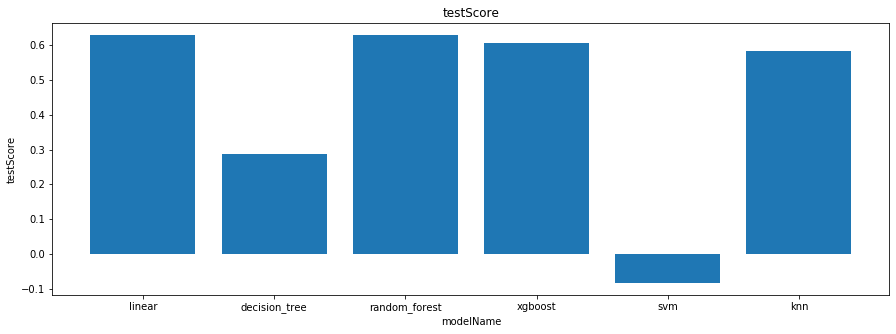

In [34]:
TestAndPrintResults(regrModelsProject, regrProjectDataSplit)

### Klasteryzacja

In [35]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

%matplotlib inline
import seaborn as sns

In [66]:
for i in range(1,10):
    pca = PCA(n_components=i)
    dane_pca = pca.fit(dane_enc.drop(columns = 'charges')).transform(dane_enc.drop(columns = 'charges'))
    print(f'zmiennych: {i}')
    print(f'wspolczynnik wyjasnionych wariancji ({i} pierwszych skladowych): %s' %str
    (pca.explained_variance_ratio_))
    print(f'suma wyjasnionych wariancji ({i} pierwszych skladowych): %s' %str
    (sum(pca.explained_variance_ratio_)))
# optymalnie 3 klastry

zmiennych: 1
wspolczynnik wyjasnionych wariancji (1 pierwszych skladowych): [0.84506861]
suma wyjasnionych wariancji (1 pierwszych skladowych): 0.8450686065357629
zmiennych: 2
wspolczynnik wyjasnionych wariancji (2 pierwszych skladowych): [0.84506861 0.14404363]
suma wyjasnionych wariancji (2 pierwszych skladowych): 0.9891122362930422
zmiennych: 3
wspolczynnik wyjasnionych wariancji (3 pierwszych skladowych): [0.84506861 0.14404363 0.00629218]
suma wyjasnionych wariancji (3 pierwszych skladowych): 0.9954044129364055
zmiennych: 4
wspolczynnik wyjasnionych wariancji (4 pierwszych skladowych): [0.84506861 0.14404363 0.00629218 0.00107622]
suma wyjasnionych wariancji (4 pierwszych skladowych): 0.9964806314114474
zmiennych: 5
wspolczynnik wyjasnionych wariancji (5 pierwszych skladowych): [0.84506861 0.14404363 0.00629218 0.00107622 0.00106608]
suma wyjasnionych wariancji (5 pierwszych skladowych): 0.9975467073356262
zmiennych: 6
wspolczynnik wyjasnionych wariancji (6 pierwszych skladowych):

In [37]:
pca.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 9,
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

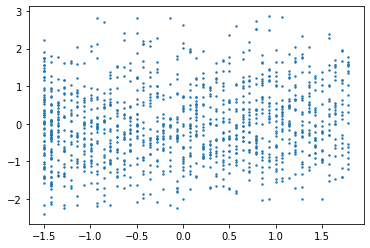

In [79]:
zmienne_all = scale(dane_enc.drop(columns = 'charges').values)
plt.scatter(zmienne_all[:, 0], zmienne_all[:, 1], 2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


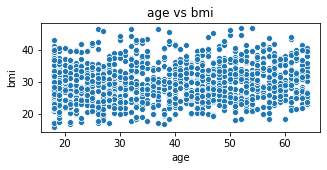

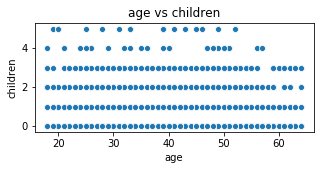

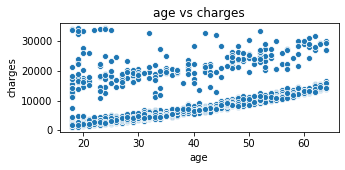

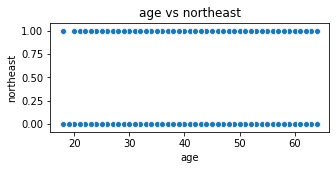

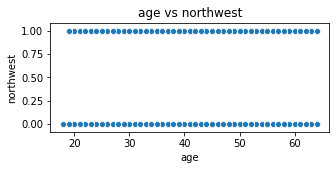

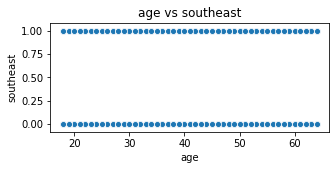

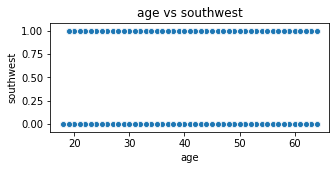

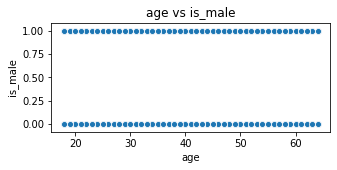

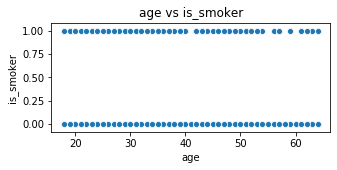

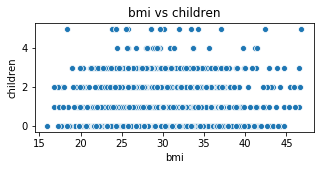

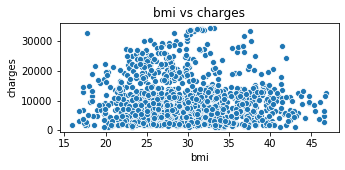

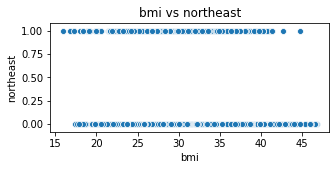

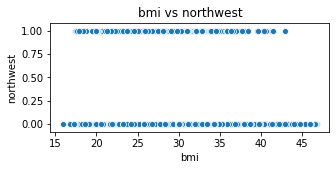

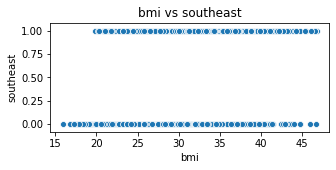

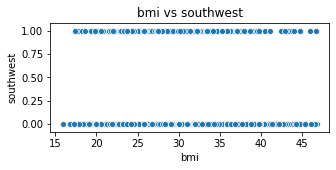

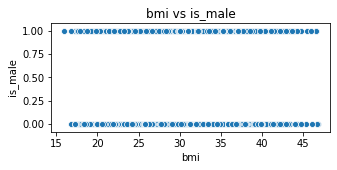

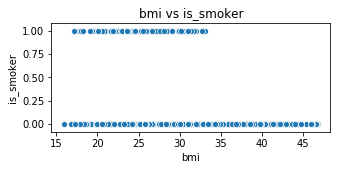

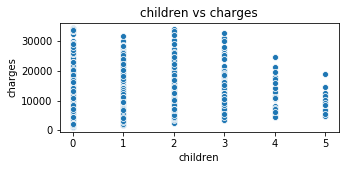

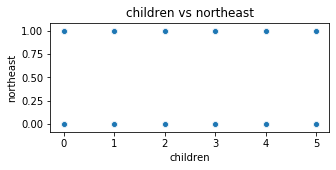

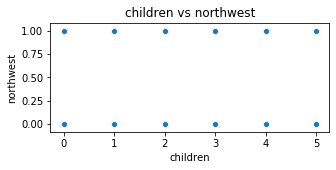

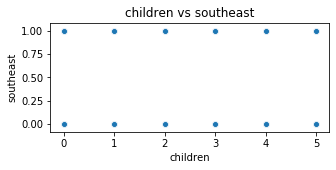

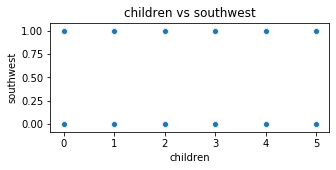

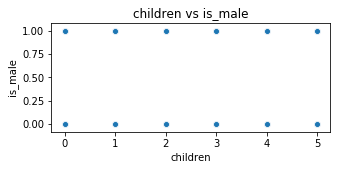

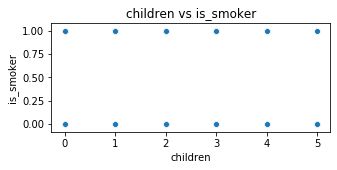

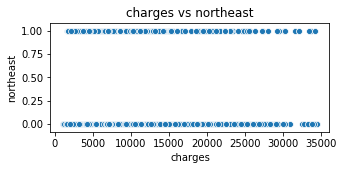

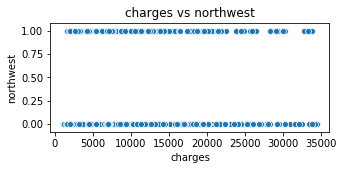

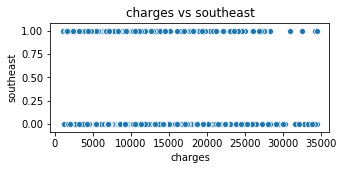

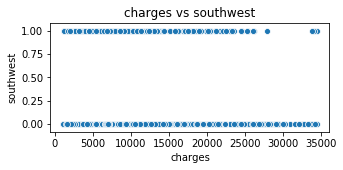

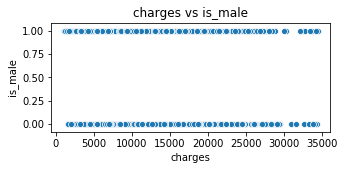

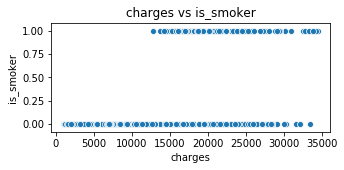

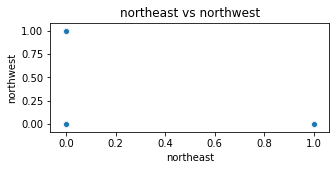

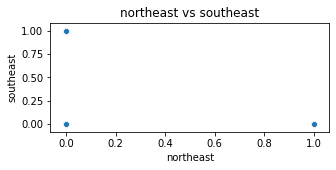

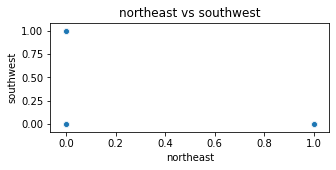

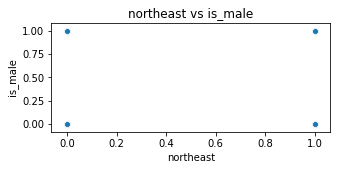

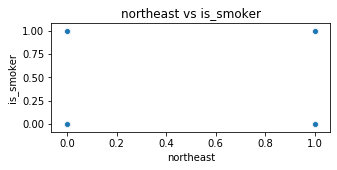

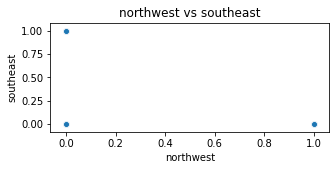

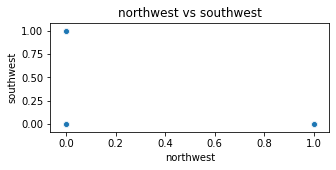

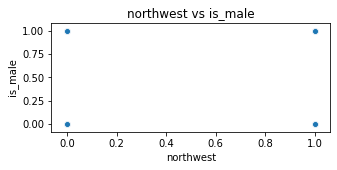

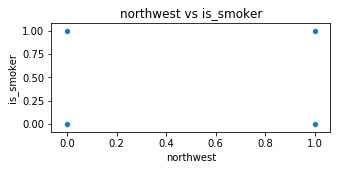

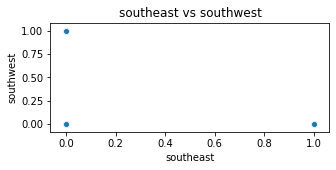

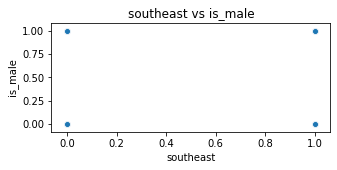

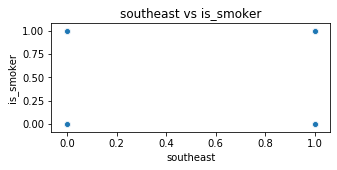

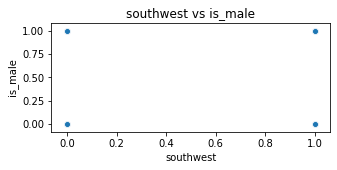

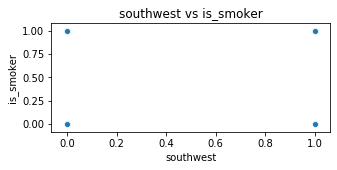

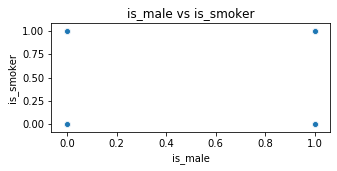

In [39]:
zmienne = list(['age', 'bmi', 'children', 'charges', 'northeast', 'northwest', 'southeast', 'southwest', 'is_male', 'is_smoker'
               ])

for i in range(0,11):
    for j in range(i+1,10):
        plt.figure(figsize=(5,2))
        ax = sns.scatterplot(x=zmienne[i],y=zmienne[j],data=dane_enc)
        ax.set_title(f'{zmienne[i]} vs {zmienne[j]}')
    


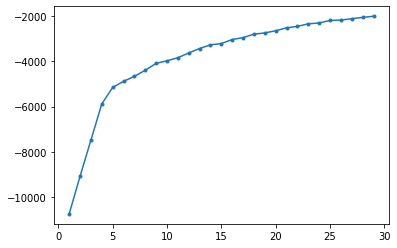

In [67]:
dane_enc_norm = scale(dane_enc.drop(columns = 'charges'))

scores = [KMeans(k).fit(dane_enc_norm).score(dane_enc_norm) for k in range(1, 30)]
plt.plot(range(1, 30), scores, markersize=3, marker="o")
plt.show() 
# 5 wymiarów

In [68]:
ckm1 = KMeans(1).fit(dane_enc_norm)#.predict(dane_enc_norm)
ckm2 = KMeans(2).fit(dane_enc_norm)#.predict(dane_enc_norm)
ckm3 = KMeans(3).fit(dane_enc_norm)#.predict(dane_enc_norm)
ckm4 = KMeans(4).fit(dane_enc_norm)#.predict(dane_enc_norm)
ckm5 = KMeans(5).fit(dane_enc_norm)#.predict(dane_enc_norm)
ckm6 = KMeans(6).fit(dane_enc_norm)#.predict(dane_enc_norm)

In [69]:
ckm11 = KMeans(1).fit(dane_enc_norm).predict(dane_enc_norm)
ckm22 = KMeans(2).fit(dane_enc_norm).predict(dane_enc_norm)
ckm33 = KMeans(3).fit(dane_enc_norm).predict(dane_enc_norm)
ckm44 = KMeans(4).fit(dane_enc_norm).predict(dane_enc_norm)
ckm55 = KMeans(5).fit(dane_enc_norm).predict(dane_enc_norm)
ckm66 = KMeans(6).fit(dane_enc_norm).predict(dane_enc_norm)
# plt.scatter(dane_enc_norm[:,0], dane_enc_norm[:,1], 2, c=ckm)

In [70]:
dane_enc_norm[1]

array([-1.49254342,  0.64311138, -0.07032657, -0.573156  , -0.58606183,
        1.7176528 , -0.56799332,  1.02461123, -0.36167069])

In [72]:
dane_enc.drop(columns = 'charges')

,age,bmi,children,northeast,northwest,southeast,southwest,is_male,is_smoker
0,19,27.900,0,0.0,0.0,0.0,1.0,0,1
1,18,33.770,1,0.0,0.0,1.0,0.0,1,0
2,28,33.000,3,0.0,0.0,1.0,0.0,1,0
3,33,22.705,0,0.0,1.0,0.0,0.0,1,0
4,32,28.880,0,0.0,1.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0.0,1.0,0.0,0.0,1,0
1334,18,31.920,0,1.0,0.0,0.0,0.0,0,0
1335,18,36.850,0,0.0,0.0,1.0,0.0,0,0
1336,21,25.800,0,0.0,0.0,0.0,1.0,0,0


In [73]:
print ("Inertia for K-mean with 1 clusters =", ckm1.inertia_)
print ("Inertia for K-mean with 2 clusters =", ckm2.inertia_)
print ("Inertia for K-mean with 3 clusters =", ckm3.inertia_)
print ("Inertia for K-mean with 4 clusters =", ckm4.inertia_)
print ("Inertia for K-mean with 5 clusters =", ckm5.inertia_)
print ("Inertia for K-mean with 6 clusters =", ckm6.inertia_)

Inertia for K-mean with 1 clusters = 10736.999999999996
Inertia for K-mean with 2 clusters = 9077.492686768508
Inertia for K-mean with 3 clusters = 7479.736634492046
Inertia for K-mean with 4 clusters = 5885.170141351556
Inertia for K-mean with 5 clusters = 5154.278298609678
Inertia for K-mean with 6 clusters = 4885.453096600969


In [74]:
pca = PCA(n_components=3)
x_pca=pca.fit_transform(dane_enc.drop(columns = 'charges'))
print(pca.explained_variance_ratio_)

[0.84506861 0.14404363 0.00629218]


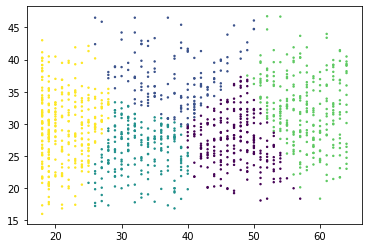

In [75]:
ckm55_pca = KMeans(5).fit(x_pca).predict(x_pca)
plt.scatter(dane_enc.iloc[:,0], dane_enc.iloc[:,1], 2, c=ckm55_pca)

In [78]:
ckm55_pca.get_params(deep=True)

AttributeError: 'numpy.ndarray' object has no attribute 'get_params'